# K-nearest neighbors na Regressão
   Assim como antes nos problemas de classificação podemos utilizar a distância euclidiana para calcular a distância entre as instâncias porem a diferença reside na forma em que será calculado o valor para se associar a instância que está sendo testada.
   Invés de usarmos aquela classe que aparece com mais frequência(classe dominante) no vetor dos vizinhos mais próximos, pegaremos uma média dos valores dessas instâncias. A saída é um valor numérico. Este valor será uma medida de posição dos valores dos seus vizinhos mais próximos, por exemplo a média ou mediana.

In [23]:
import pandas as pd
dataset_train = pd.read_csv('../../data/modified/addFeatureTrain.csv') # Importing train dataframe
dataset_test = pd.read_csv('../../data/modified/addFeatureTest.csv') # Importing test dataframe

In [24]:
# select train data
x_train = dataset_train.drop('y', axis=1)
y_train = dataset_train['y']

# select test data
x_test = dataset_test.drop('y', axis=1)
y_test = dataset_test['y']

In [25]:
print("Train: % " + str(len(x_train)/(len(x_train) + len(x_test)))) # % de treino
print("Test: % " + str(len(x_test)/(len(x_train) + len(x_test)))) # % de teste

Train: % 0.8729777911064461
Test: % 0.12702220889355392


## Definindo o melhor K para o KNN

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import time

init = time.time() # initial time point

# Search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsRegressor with k neighbours
    knn = KNeighborsRegressor(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsRegressor with k neighbours
    scores = cross_val_score(knn, x_test, y_test, cv=10, scoring='r2')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print('Execution time: {} seconds'.format(str(time.time() - init)))
print('K Scores List' + str(k_scores))

print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Execution time: 114.47944951057434 seconds
K Scores List[0.23055549242938395, 0.3641509555957537, 0.39486908660311, 0.39848018540719454, 0.40952671283359593, 0.41504799161822914, 0.4110467102264176, 0.4018511442557263, 0.3985164796703799, 0.4012406833324637, 0.39528086813266794, 0.39194151472439426, 0.38723891281740874, 0.38458923426469693, 0.38275056119983664, 0.3819662203660069, 0.38007800530073155, 0.378280498198511, 0.37611717023856944, 0.3748540961257304, 0.37427509085932653, 0.37215859963218645, 0.36871242231935175, 0.3682813185718541, 0.3670749027254565, 0.3651728915401213, 0.36235076606216976, 0.360076393393584, 0.35768481300827454, 0.3553467247955494]
Length of list 30
Max of list 0.41504799161822914


## Exibindo os valores de K em relação aos score's

Text(0,0.5,'Cross-validated R2')

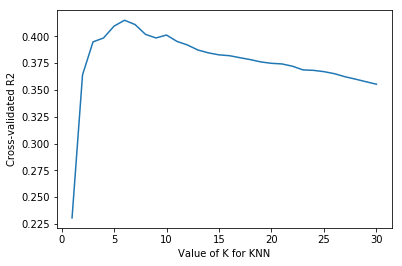

In [27]:
# plot how score changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the r2 cross-validated (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN') # Set x label
plt.ylabel('Cross-validated R2') # Set y label

### Aplicando o Knn Regressor com o "K" que contém o maior score. Aproximadamente 6

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import time

init = time.time()

neigh = KNeighborsRegressor(n_neighbors=6)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
cv = cross_val_score(neigh,x_test, y_test,scoring='r2')
neigh_score = neigh.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)

print('Execution time: {} seconds'.format(str(time.time() - init)))
print('R2 score: {}'.format(neigh_score))
print(cv)
print('MAE: {}'.format(mae))

Execution time: 13.759848594665527 seconds
R2 score: 0.3829542080566475
[0.41569626 0.3748552  0.3378088 ]
MAE: 0.4815203449262496


## K Fold

In [29]:
import numpy as np

k = 10  # 10-fold
scores = cross_val_score(neigh,x_test, y_test,cv= k)
print(scores)
hite_rate = np.mean(scores) 
print("Mean : " + str(hite_rate))

[0.47099594 0.41674073 0.5118461  0.38456244 0.44225457 0.34499196
 0.44509675 0.39662344 0.35171968 0.38564831]
Mean : 0.41504799161822914


## Predições em relação ao resultado original

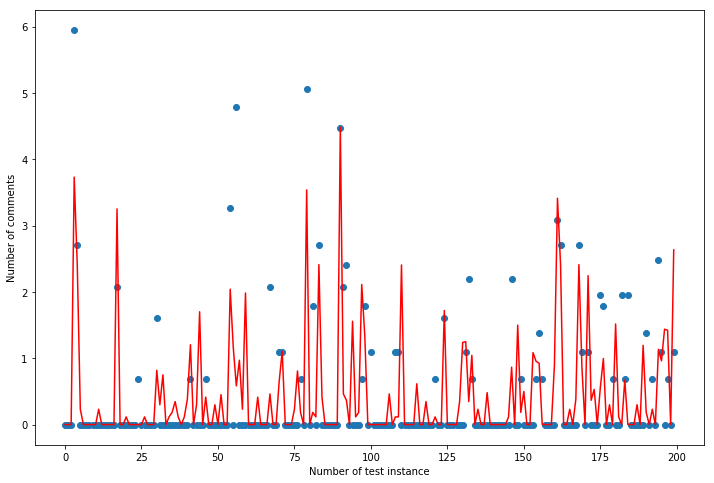

In [30]:
import matplotlib.pyplot as plt
import matplotlib as mpl

x = np.arange(200)
mpl.rcParams['figure.figsize'] = (12, 8)

plt.scatter(x, y_test[:200])
plt.plot(x, y_pred[:200], color='red')
plt.xlabel('Number of test instance') # Set x label
plt.ylabel('Number of comments') # Set y label
plt.show()